In [ ]:
pip install -q tflite-model-maker

     |████████████████████████████████| 593kB 10.0MB/s 
     |████████████████████████████████| 6.3MB 17.7MB/s 
     |████████████████████████████████| 686kB 50.3MB/s 
     |████████████████████████████████| 849kB 53.1MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
     |████████████████████████████████| 112kB 61.1MB/s 
     |████████████████████████████████| 122kB 53.9MB/s 
     |████████████████████████████████| 174kB 53.0MB/s 
     |████████████████████████████████| 1.1MB 50.7MB/s 
     |████████████████████████████████| 92kB 12.1MB/s 
     |████████████████████████████████| 645kB 47.4MB/s 
     |████████████████████████████████| 1.2MB 50.6MB/s 
     |████████████████████████████████| 358kB 45.4MB/s 
     |████████████████████████████████| 102kB 13.6MB/s 
     |████████████████████████████████| 38.2MB 68kB/s 
     |████████████████████████████████| 194kB 46.1MB/s 


In [ ]:
!pip install tensorflow_hub

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
from tflite_model_maker.image_classifier import ModelSpec

import matplotlib.pyplot as plt

In [ ]:
#mount google drive to store the notebook, output, etc.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# path to image dataset 
#image_path = '/content/drive/MyDrive/Squirrel_Training'
image_path = '/content/drive/MyDrive/Bird_Images'
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/models/Bird_Models'

In [ ]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 2291, num_label: 16, labels: Black-capped Chickadee, Black-eyed Junco, Blue Jay, Cardinal, Downy Woodpecker, Goldfinch, Grackle, House Finch, Northern Flicker, Nothing, Nuthatch, Pine Siskin, Red-bellied Woodpecker, Sparrow, Titmouse, Wren.


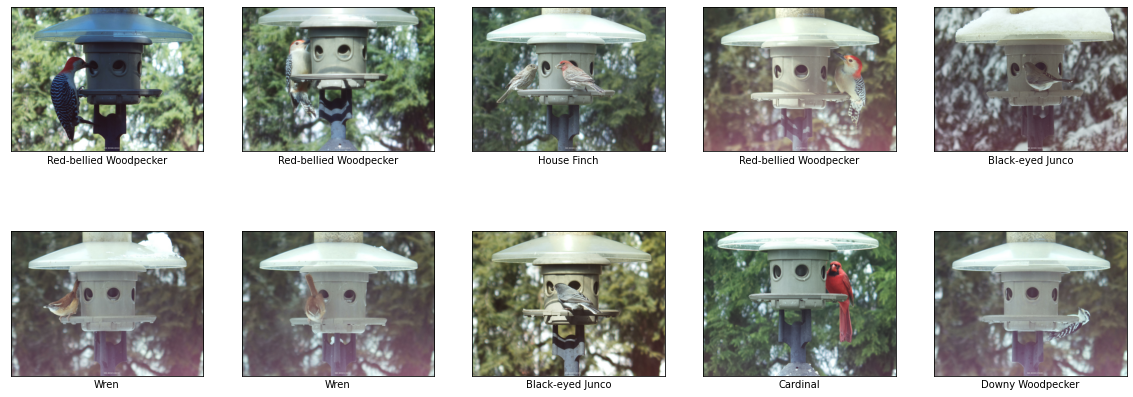

In [ ]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_data.gen_dataset().unbatch().take(10)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
#mobilenet_spec = ModelSpec(
#    uri='https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5')
#mobilenet_spec.input_image_shape = [224, 224]

In [ ]:
model = image_classifier.create(train_data,learning_rate = 0.01, epochs=10, use_augmentation=False, train_whole_model = False)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                20496     
Total params: 3,433,520
Trainable params: 20,496
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10
64/64 [==============================] - 475s 7s/step - loss: 2.4961 - accuracy: 0.2296
Epoch 2/10
64/64 [==============================] - 220s 3s/step - loss: 1.6549 - accuracy: 0.5877
Epoch 3/10
64/64 [==============================] - 218s 3s/step - loss: 1.4608 - accuracy: 0.6714
Epoch 4/10
64/64 [==========

In [ ]:
loss, accuracy = model.evaluate(test_data) 

8/8 [==============================] - 71s 6s/step - loss: 1.1883 - accuracy: 0.7565


In [ ]:
#config = QuantizationConfig.for_int8(representative_data=test_data)
#loss, accuracy = model.evaluate(test_data) 

8/8 [==============================] - 62s 4s/step - loss: 0.9528 - accuracy: 0.8957


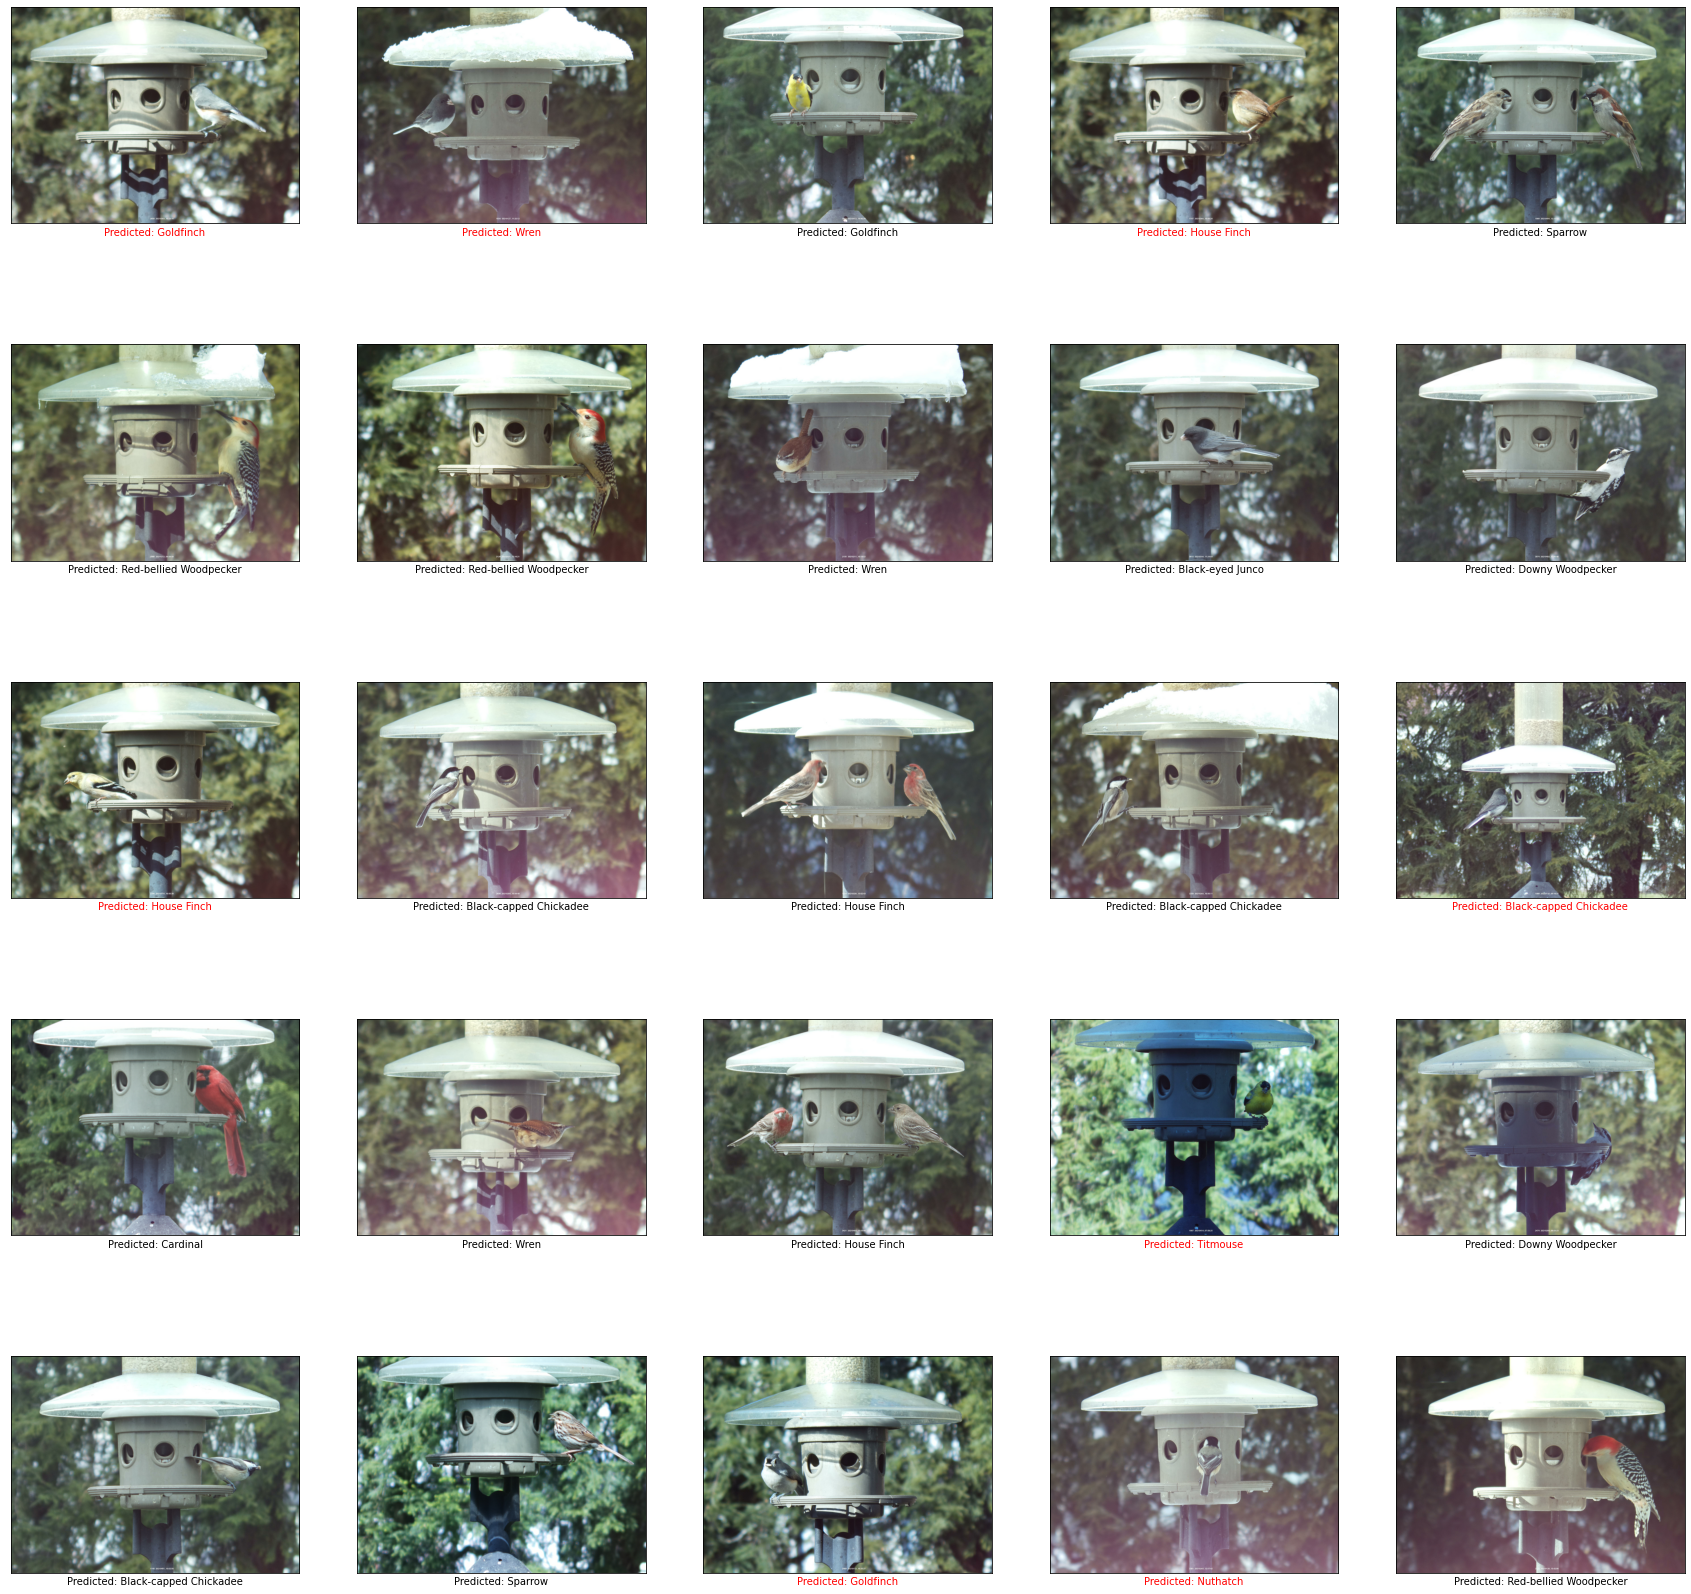

In [ ]:
# https://www.tensorflow.org/lite/tutorials/model_maker_image_classification
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 25 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(30, 30))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(25)):
  ax = plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

It got several wrong, but it's not too bad. But the results aren't as good as I got with a fast.ai model (which won't run on the Pi). So there's a trade-off here between accuracy and the ability to run it on the edge.

In [ ]:
#model.export(export_dir='/content/drive/MyDrive/Colab Notebooks/models/Bird_Models', with_metadata=False, tflite_filename='model_quant.tflite', quantization_config=config)
model.export(export_dir='/content/drive/MyDrive/Colab Notebooks/models/Bird_Models', with_metadata=False, tflite_filename='model_quant.tflite')

INFO:tensorflow:Assets written to: /tmp/tmp3wxf1r5q/assets


INFO:tensorflow:Assets written to: /tmp/tmp3wxf1r5q/assets


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/Colab Notebooks/models/Bird_Models/model_quant.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/Colab Notebooks/models/Bird_Models/model_quant.tflite


INFO:tensorflow:Saving labels in /content/drive/MyDrive/Colab Notebooks/models/Bird_Models/labels.txt.


INFO:tensorflow:Saving labels in /content/drive/MyDrive/Colab Notebooks/models/Bird_Models/labels.txt.
